In [28]:
## Packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

In [21]:
## Load data
pd.options.display.max_columns = None
supply_chain = pd.read_csv("datasets/DataCoSupplyChainDataset.csv", encoding='latin1')
data_dict = pd.read_csv("datasets/DescriptionDataCoSupplyChain.csv", encoding='latin1')
logs = pd.read_csv("datasets/tokenized_access_logs.csv", encoding='latin1')
supply_chain.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [22]:
## Data Preprocessing

supply_chain.shape[0]

# Clean field names below

## Replace whitespace in column names and remove erroneous characters
supply_chain.columns = supply_chain.columns.str.replace('[ ]', "_", regex = True) 
supply_chain.columns = supply_chain.columns.str.replace('[()]', "", regex = True) 

## Make column names all lowercase
supply_chain.columns = supply_chain.columns.str.lower()

## Review how many nulls in data
nulls = supply_chain.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False)
nulls


product_description    180519
order_zipcode          155679
customer_lname              8
customer_zipcode            3
dtype: int64

In [27]:
## Look for dupes
supply_chain[supply_chain.duplicated()]

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_dateorders,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,product_card_id,product_category_id,product_image,product_name,product_price,product_status,shipping_date_dateorders,shipping_mode


In [23]:
## Data Cleaning

## Remove relevant null columns
supply_chain.drop(columns = ['product_description', 'order_zipcode'], inplace=True)

## Update date format
supply_chain['order_date_dateorders'] = pd.to_datetime(supply_chain['order_date_dateorders'])
supply_chain['shipping_date_dateorders'] = pd.to_datetime(supply_chain['shipping_date_dateorders'])



In [29]:
## Data Analysis Start
supply_chain.info()

supply_chain.describe()

## Remove Product status since they are all zero
supply_chain.drop(columns = ['product_status'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   type                         180519 non-null  object        
 1   days_for_shipping_real       180519 non-null  int64         
 2   days_for_shipment_scheduled  180519 non-null  int64         
 3   benefit_per_order            180519 non-null  float64       
 4   sales_per_customer           180519 non-null  float64       
 5   delivery_status              180519 non-null  object        
 6   late_delivery_risk           180519 non-null  int64         
 7   category_id                  180519 non-null  int64         
 8   category_name                180519 non-null  object        
 9   customer_city                180519 non-null  object        
 10  customer_country             180519 non-null  object        
 11  customer_email            

## Look at the following to explore

- Sales, Orders, Profit, Discounts, Department Store Type, Product Category, Region
- Look at spread, correlation (how to setup?), trends, streamline of order status?

Use meeting to go through this

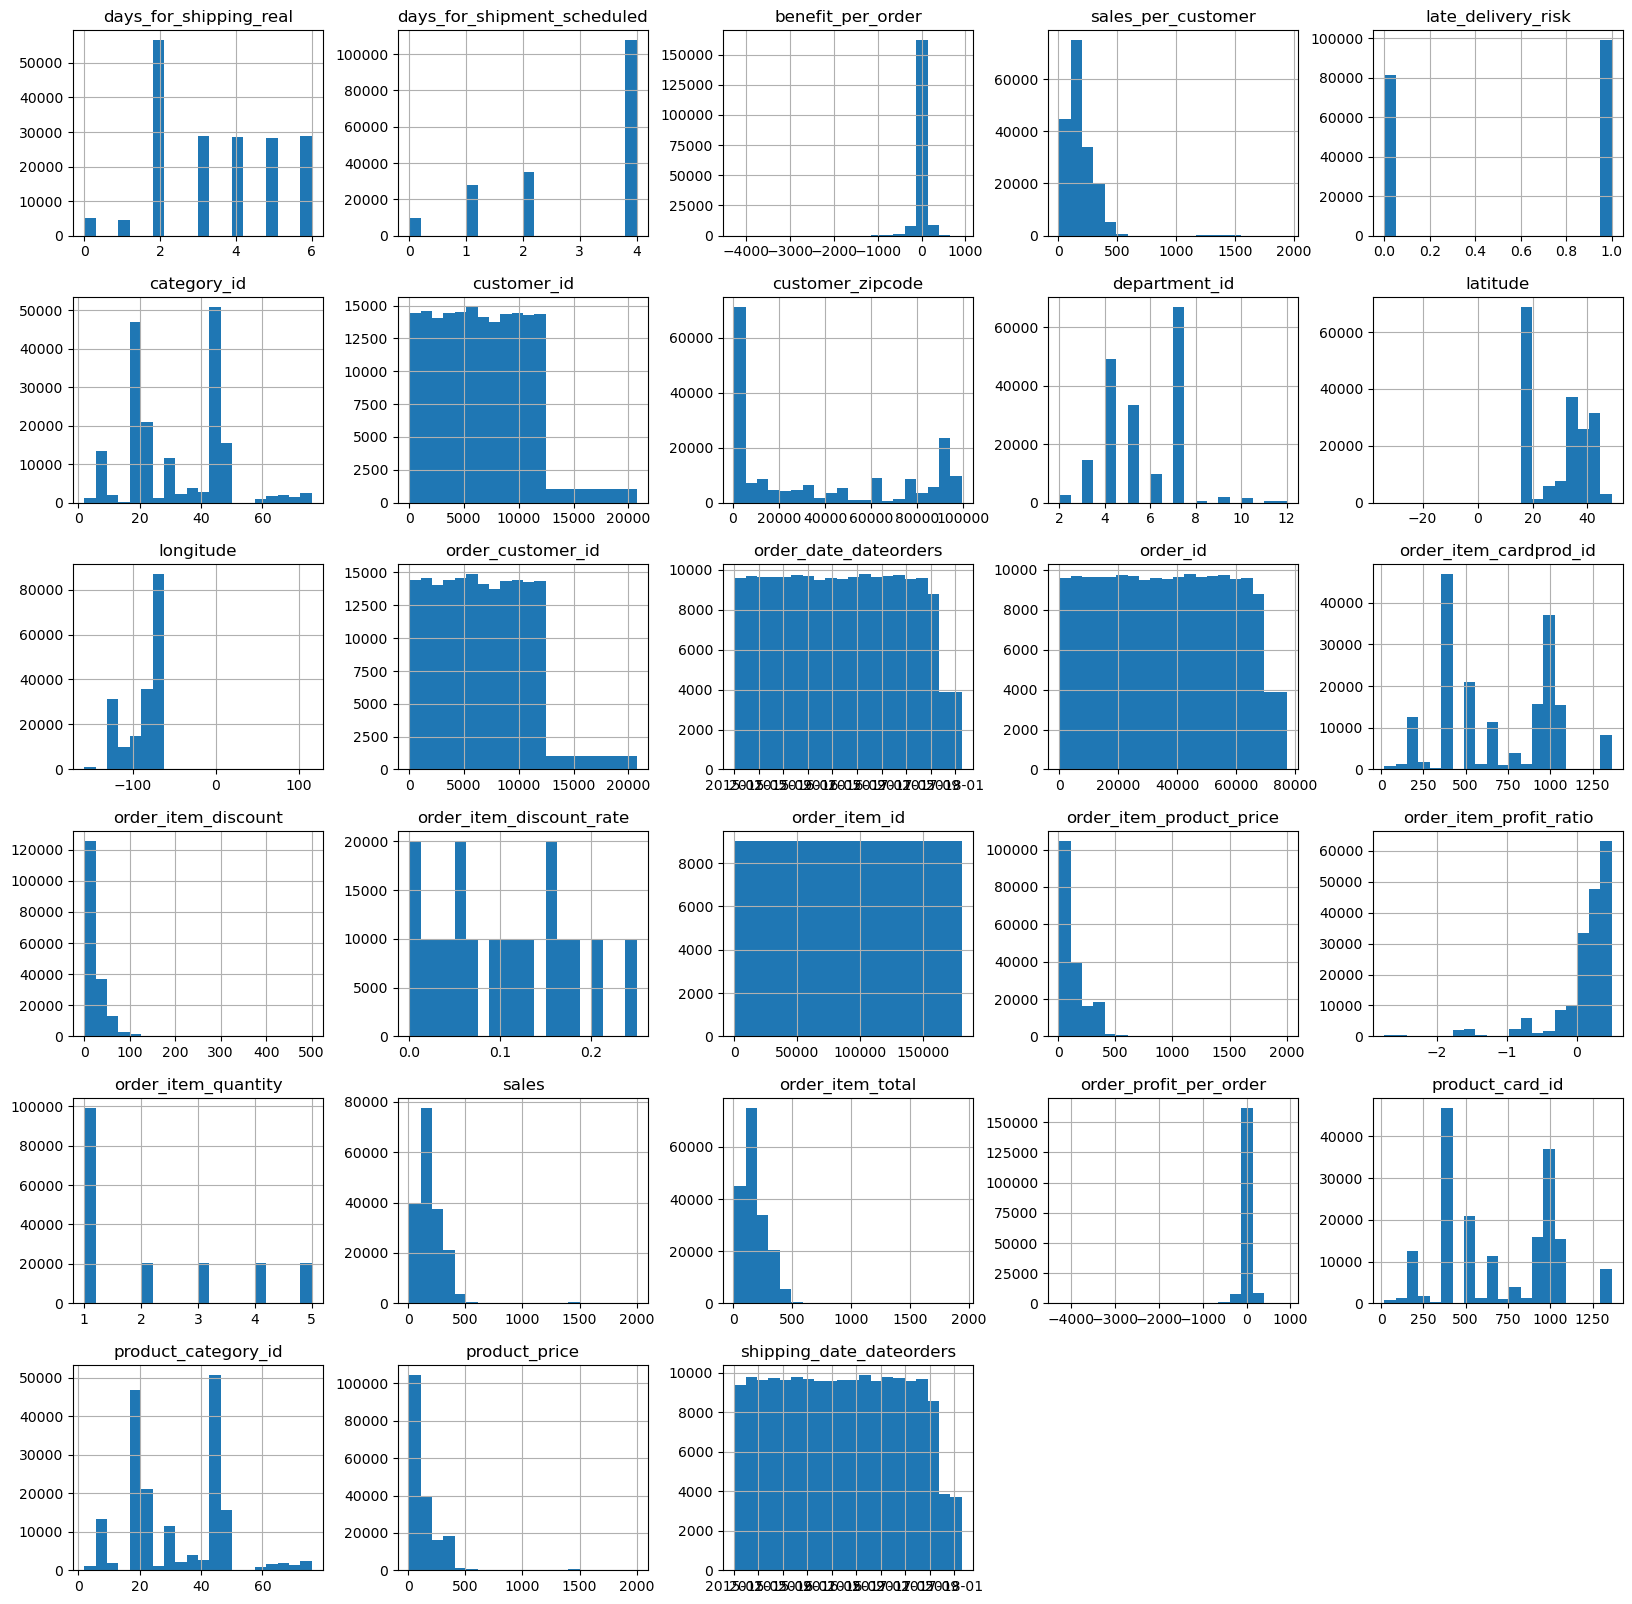

In [45]:
## View all numeric variables 

supply_chain.hist(figsize=(20,20),bins = 20)
plt.show()

Based on what we see distributed, the following are continuous and metrics to look at:
- sales_per_customer
- order_item_discount
- order_item_product_price
- order_item_profit_ratio
- order_profit_per_order? looks very tight
- sales
- order_item_total
- prodcut_price

In [ ]:
# Correlation next? What is it we want to see with correlation?